<a href="https://colab.research.google.com/github/Devika-37/EDA_Project_22BDS0420/blob/main/22BDS0420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



# Step 1: Install & Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/TravelMode.csv"
df = pd.read_csv(url)



In [3]:
# Step 3: Basic Exploration
print("Dataset Dimensions:", df.shape)
print("\n First 5 Rows:")
print(df.head())

print("\n Data Types & Null Counts:")
print(df.info())

print("\n Summary Statistics (Numerical):")
print(df.describe())

print("\n Summary Statistics (Categorical):")
print(df.describe(include=['object']))




Dataset Dimensions: (840, 10)

 First 5 Rows:
   rownames  individual   mode choice  wait  vcost  travel  gcost  income  \
0         1           1    air     no    69     59     100     70      35   
1         2           1  train     no    34     31     372     71      35   
2         3           1    bus     no    35     25     417     70      35   
3         4           1    car    yes     0     10     180     30      35   
4         5           2    air     no    64     58      68     68      30   

   size  
0     1  
1     1  
2     1  
3     1  
4     2  

 Data Types & Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rownames    840 non-null    int64 
 1   individual  840 non-null    int64 
 2   mode        840 non-null    object
 3   choice      840 non-null    object
 4   wait        840 non-null    int64 
 5   vcost       8

In [4]:

# Step 4: Data Handling
print("\n Missing Values per Column:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())



 Missing Values per Column:
rownames      0
individual    0
mode          0
choice        0
wait          0
vcost         0
travel        0
gcost         0
income        0
size          0
dtype: int64

Duplicate Rows: 0


In [9]:

# Step 5: Data Cleaning

# Fill missing numerical with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill missing categorical with mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

print("\nData Cleaning Completed!")
print(df.isnull().sum())





Data Cleaning Completed!
rownames      0
individual    0
mode          0
choice        0
wait          0
vcost         0
travel        0
gcost         0
income        0
size          0
dtype: int64


/tmp/ipython-input-3099141728.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


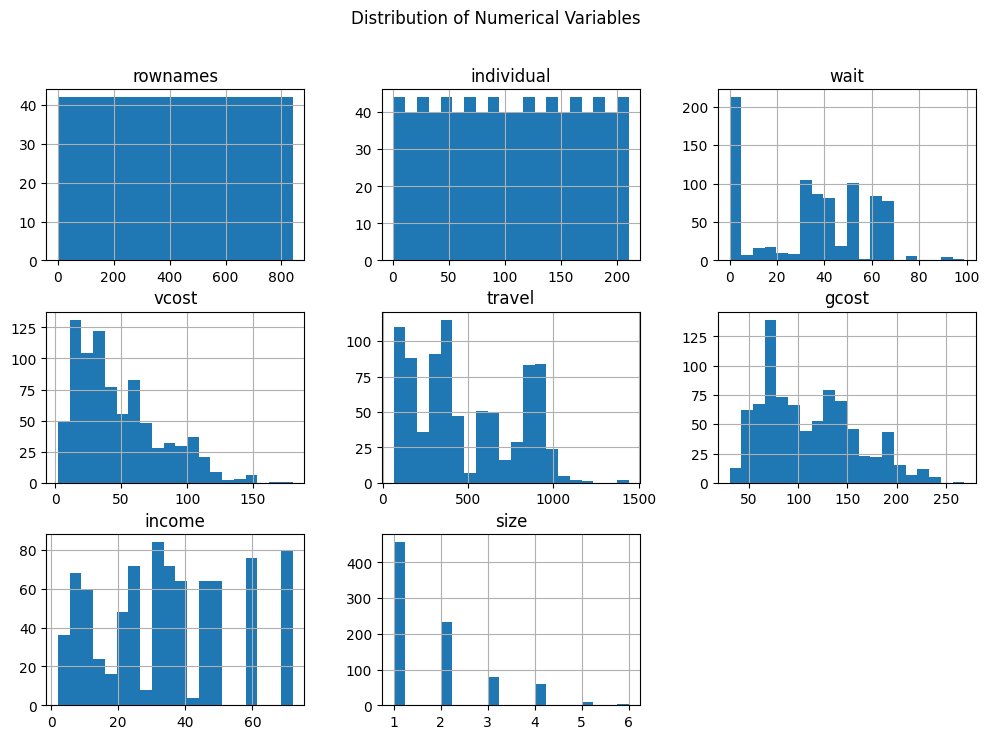

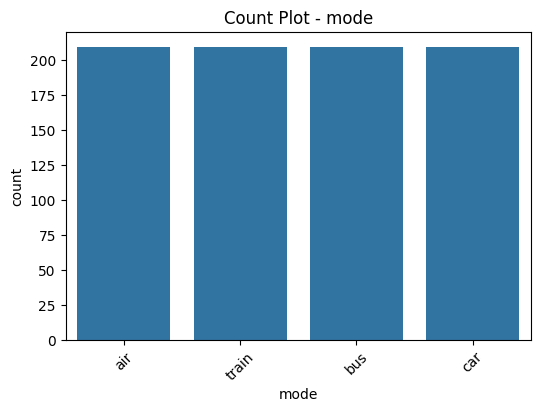

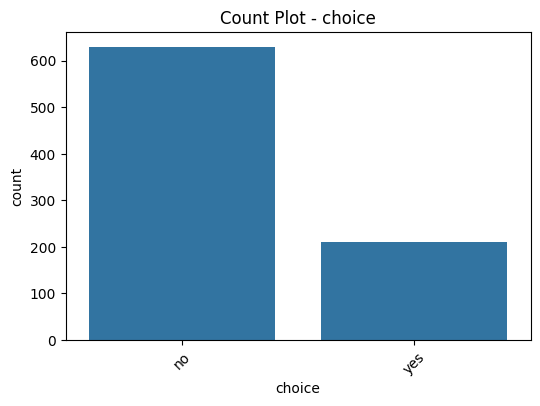

In [6]:

# Step 6: Univariate Analysis

# Numerical variables distribution
if len(num_cols) > 0:
    df[num_cols].hist(bins=20, figsize=(12, 8))
    plt.suptitle("Distribution of Numerical Variables")
    plt.show()

# Categorical variables count plot
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot - {col}")
    plt.xticks(rotation=45)
    plt.show()



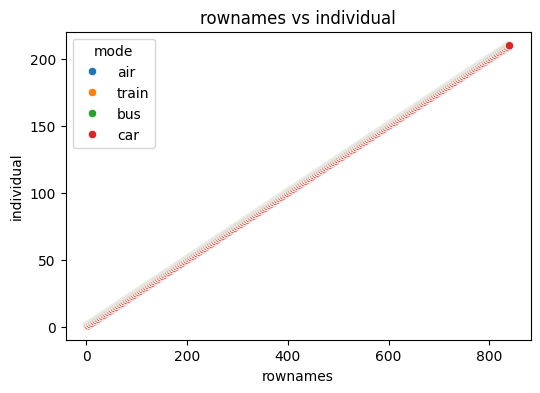

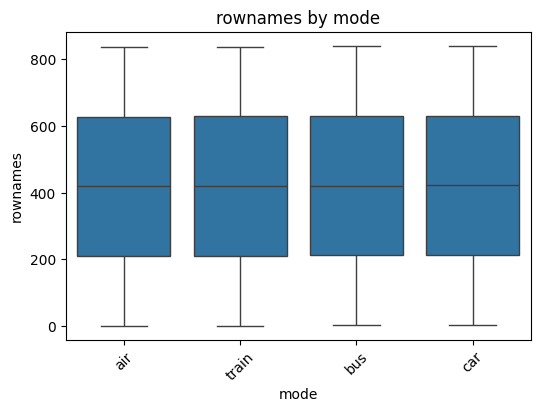

In [7]:

# Step 7: Bivariate Analysis

# Example scatter plot between first two numeric columns
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]], hue=df[cat_cols[0]])
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()

# Example boxplot for numerical vs categorical
if len(num_cols) > 0 and len(cat_cols) > 0:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[cat_cols[0]], y=df[num_cols[0]])
    plt.title(f"{num_cols[0]} by {cat_cols[0]}")
    plt.xticks(rotation=45)
    plt.show()

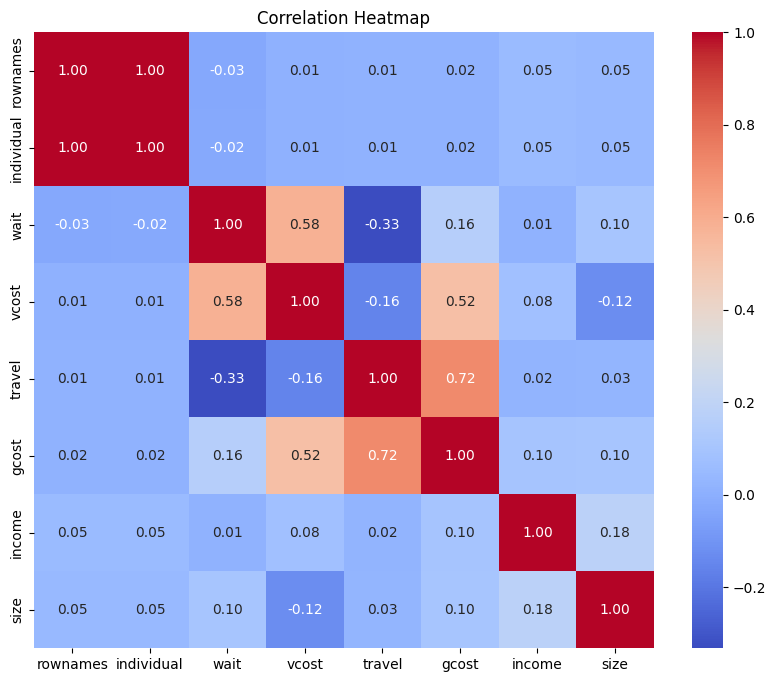

In [8]:
#Step 8: Multivariate Analysis

# Correlation heatmap (numeric only)
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Pairplot for small number of numeric columns
if 2 <= len(num_cols) <= 6:
    sns.pairplot(df[num_cols])
    plt.show()
